In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import os

In [4]:
base_dir = "/content/drive/MyDrive/Final_Project/images"

In [5]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 8974 images belonging to 17 classes.
Found 2238 images belonging to 17 classes.


In [6]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
labels
with open('labels.txt', 'w') as f:
  f.write(labels)

{'Airsoft': 0, 'Beach volleyball': 1, 'Cycle polo': 2, 'Flag football': 3, 'Karate': 4, 'Motocross': 5, 'Muay Thai': 6, 'Nordic skiing': 7, 'Olympic weightlifting': 8, 'Parachuting': 9, 'Rallycross': 10, 'Roller hockey': 11, 'Rugby union': 12, 'Sprint car racing': 13, 'Table tennis': 14, 'Wakeboarding': 15, 'no sport': 16}


In [7]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [8]:
base_model.trainable = False

In [9]:
model = tf.keras.Sequential([    
                            base_model,
                                                        
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(64),
                            tf.keras.layers.Dense(32),
                            tf.keras.layers.Dense(17, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 17)                561       
                                                        

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
epochs = 5

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data=val_generator)

Epoch 1/5
141/141 [==============================] - 2326s 16s/step - loss: 7.0082 - accuracy: 0.7800 - val_loss: 3.4782 - val_accuracy: 0.8601
Epoch 2/5
141/141 [==============================] - 330s 2s/step - loss: 1.0939 - accuracy: 0.9329 - val_loss: 3.8606 - val_accuracy: 0.8610
Epoch 3/5
141/141 [==============================] - 332s 2s/step - loss: 0.4938 - accuracy: 0.9641 - val_loss: 3.5790 - val_accuracy: 0.8704
Epoch 4/5
141/141 [==============================] - 333s 2s/step - loss: 0.3379 - accuracy: 0.9741 - val_loss: 4.0605 - val_accuracy: 0.8695
Epoch 5/5
141/141 [==============================] - 336s 2s/step - loss: 0.2200 - accuracy: 0.9805 - val_loss: 4.1640 - val_accuracy: 0.8494


In [12]:
saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: /tmp/tmpfiptct3v/assets


INFO:tensorflow:Assets written to: /tmp/tmpfiptct3v/assets


In [13]:
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from tensorflow import keras
from tensorflow.keras import layers, models

In [16]:
pip install visualkeras

     |████████████████████████████████| 992 kB 20.6 MB/s 


In [17]:
import visualkeras

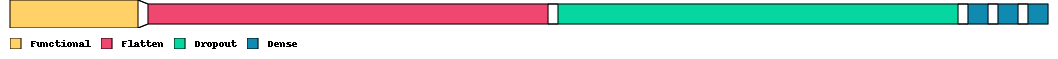

In [18]:
visualkeras.layered_view(model, legend=True, draw_volume=False) 

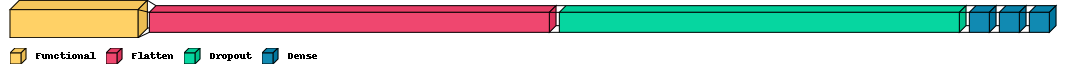

In [19]:
visualkeras.layered_view(model, legend=True)

In [20]:
# Measure accuracy and loss after training

In [24]:
final_loss, final_accuracy = model.evaluate(val_generator)

35/35 [==============================] - 68s 2s/step - loss: 4.1640 - accuracy: 0.8494


In [25]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 4.16
Final accuracy: 84.94%


In [27]:
import matplotlib.pylab as plt

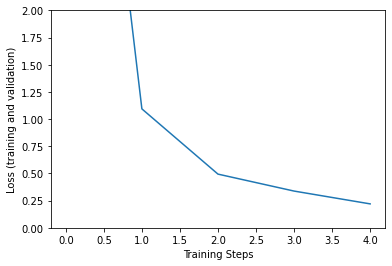

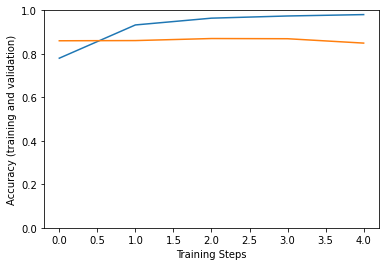

In [88]:
# Visualize training process

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [37]:
import numpy as np

In [40]:
# Get images and labels batch from validation dataset generator
# Validation batch shape tells us that we have a batch of 32 images, with size and channels: 224x224x3.

val_image_batch, val_label_batch = next(iter(val_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (64, 224, 224, 3)


In [41]:
#calculate predictions for the entire batch.

tf_model_predictions = model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (64, 17)


In [43]:
import pandas as pd

In [49]:
dataset_labels = sorted(train_generator.class_indices.keys())

In [50]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Airsoft,Beach volleyball,Cycle polo,Flag football,Karate,Motocross,Muay Thai,Nordic skiing,Olympic weightlifting,Parachuting,Rallycross,Roller hockey,Rugby union,Sprint car racing,Table tennis,Wakeboarding,no sport
0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
1,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
2,6.864439e-35,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,4.684866e-01,2.796155e-27,0.000000e+00,0.000000e+00,5.439294e-37,1.276326e-34,0.0,0.531513
3,0.000000e+00,0.000007,0.000016,0.408729,7.680099e-15,4.175959e-25,3.495103e-23,8.236525e-38,0.0,1.734557e-11,2.794960e-11,2.835184e-32,9.817652e-20,4.405342e-26,1.236384e-20,0.0,0.591248
4,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000


In [60]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = predicted_ids

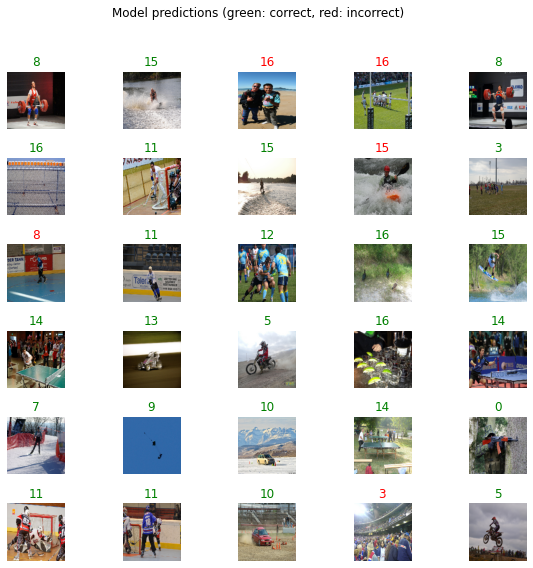

In [76]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [81]:
from PIL import Image
import numpy as np

In [102]:
#Load in Image we want to make a prediction on

img_path = '/content/drive/MyDrive/Final_Project/Test/images - 2022-02-19T154920.588.jpg'


#Preprocess image to make prediction on
img = Image.open(img_path)
# print(img)
img = img.resize((224,224))
npimg = np.array(img)
# npimg.expand_dims(1)
npimg2 = np.expand_dims(npimg, axis=0)
print(npimg2.shape)

(1, 224, 224, 3)


In [103]:
predict_prob = model.predict(npimg2)

In [104]:
predict_classes=np.argmax(predict_prob,axis=1)
predict_classes

array([9])